In [1]:
import pandas as pd
import numpy as np

In [2]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [10]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [11]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [12]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [13]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=0:
        a.append(i)

In [14]:
df = df.drop(a)

In [15]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
20832,1958,1,95,14.6,6.8,41,-0.3,himachal pradesh,chamba,3,0,2,12,21,7,6,16
20833,1958,2,21,16.8,6.5,44,-1.3,himachal pradesh,chamba,3,0,2,12,21,7,6,16
20834,1958,3,57,22.1,11.9,74,-1.9,himachal pradesh,chamba,3,0,2,12,21,7,6,16
20835,1958,4,30,28.0,17.0,69,-2.9,himachal pradesh,chamba,3,0,2,12,21,7,6,16
20836,1958,5,24,29.9,19.5,36,-3.7,himachal pradesh,chamba,3,0,2,12,21,7,6,16


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10416 entries, 20832 to 420359
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            10416 non-null  int64  
 1   Month           10416 non-null  int64  
 2   ppt(mm)         10416 non-null  int64  
 3   tmax(degC)      10416 non-null  float64
 4   tmin(degC)      10416 non-null  float64
 5   aet(mm)         10416 non-null  int64  
 6   PDSI(unitless)  10416 non-null  float64
 7   state           10416 non-null  object 
 8   district        10416 non-null  object 
 9   cluster14       10416 non-null  int64  
 10  cluster15       10416 non-null  int64  
 11  cluster18       10416 non-null  int64  
 12  cluster20       10416 non-null  int64  
 13  cluster25       10416 non-null  int64  
 14  cluster27       10416 non-null  int64  
 15  cluster30       10416 non-null  int64  
 16  cluster35       10416 non-null  int64  
dtypes: float64(3), int64(12), 

In [17]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(10416, 8)

In [18]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [20]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
20832,1958,1,95,14.6,6.8,41,-0.3,chamba,1-1958
20833,1958,2,21,16.8,6.5,44,-1.3,chamba,2-1958
20834,1958,3,57,22.1,11.9,74,-1.9,chamba,3-1958
20835,1958,4,30,28.0,17.0,69,-2.9,chamba,4-1958
20836,1958,5,24,29.9,19.5,36,-3.7,chamba,5-1958


In [21]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
20832,1958,1,95,14.6,6.8,41,-0.3,chamba,1958-01-01,1
20833,1958,2,21,16.8,6.5,44,-1.3,chamba,1958-02-01,1
20834,1958,3,57,22.1,11.9,74,-1.9,chamba,1958-03-01,1
20835,1958,4,30,28.0,17.0,69,-2.9,chamba,1958-04-01,1
20836,1958,5,24,29.9,19.5,36,-3.7,chamba,1958-05-01,1


In [23]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
20832,1958,1,95,41,-0.3,chamba,1958-01-01,1,10.70
20833,1958,2,21,44,-1.3,chamba,1958-02-01,1,11.65
20834,1958,3,57,74,-1.9,chamba,1958-03-01,1,17.00
20835,1958,4,30,69,-2.9,chamba,1958-04-01,1,22.50
20836,1958,5,24,36,-3.7,chamba,1958-05-01,1,24.70


In [24]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
420355,2019,8,385,91,-1.3,naini tal,2019-08-01,1,19.55
420356,2019,9,260,84,-1.3,naini tal,2019-09-01,1,18.70
420357,2019,10,62,75,-1.4,naini tal,2019-10-01,1,15.85
420358,2019,11,18,43,-1.0,naini tal,2019-11-01,1,12.85
420359,2019,12,116,48,1.5,naini tal,2019-12-01,1,7.45


In [25]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,331,9.30,38,chamba
1,1981-02-01,104,12.05,50,chamba
2,1981-03-01,221,15.30,81,chamba
3,1981-04-01,33,20.80,94,chamba
4,1981-05-01,43,25.90,68,chamba


In [26]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
21564,2019,1,239,36,1.4,chamba,2019-01-01,1,8.20
21565,2019,2,221,46,2.9,chamba,2019-02-01,1,11.30
21566,2019,3,83,83,2.1,chamba,2019-03-01,1,14.95
21567,2019,4,56,95,1.9,chamba,2019-04-01,1,21.70
21568,2019,5,61,98,1.9,chamba,2019-05-01,1,25.00
...,...,...,...,...,...,...,...,...,...
420355,2019,8,385,91,-1.3,naini tal,2019-08-01,1,19.55
420356,2019,9,260,84,-1.3,naini tal,2019-09-01,1,18.70
420357,2019,10,62,75,-1.4,naini tal,2019-10-01,1,15.85
420358,2019,11,18,43,-1.0,naini tal,2019-11-01,1,12.85


In [27]:
from fbprophet import Prophet

In [28]:

model = Prophet()

In [29]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
6379,2018-08-01,518,19.25,81,naini tal
6380,2018-09-01,361,17.70,86,naini tal
6381,2018-10-01,5,15.75,58,naini tal
6382,2018-11-01,61,12.35,62,naini tal
6383,2018-12-01,36,8.55,45,naini tal


In [32]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [34]:

forecast = model.predict(fut)

In [35]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,24.516085,20.664410,30.902493,24.515866,24.516364,1.156040,1.156040,1.156040,1.156040,1.156040,1.156040,0.0,0.0,0.0,25.672125
465,2019-09-30,24.516105,19.903535,30.255743,24.515841,24.516468,0.258603,0.258603,0.258603,0.258603,0.258603,0.258603,0.0,0.0,0.0,24.774708
466,2019-10-31,24.516126,16.686349,27.030531,24.515800,24.516569,-2.846226,-2.846226,-2.846226,-2.846226,-2.846226,-2.846226,0.0,0.0,0.0,21.669900
467,2019-11-30,24.516147,12.691232,23.195598,24.515741,24.516666,-6.353180,-6.353180,-6.353180,-6.353180,-6.353180,-6.353180,0.0,0.0,0.0,18.162967
468,2019-12-31,24.516168,12.441832,22.960308,24.515692,24.516788,-6.651470,-6.651470,-6.651470,-6.651470,-6.651470,-6.651470,0.0,0.0,0.0,17.864698


In [36]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,25.672125,20.664410,30.902493
465,2019-09-30,24.774708,19.903535,30.255743
466,2019-10-31,21.669900,16.686349,27.030531
467,2019-11-30,18.162967,12.691232,23.195598
468,2019-12-31,17.864698,12.441832,22.960308


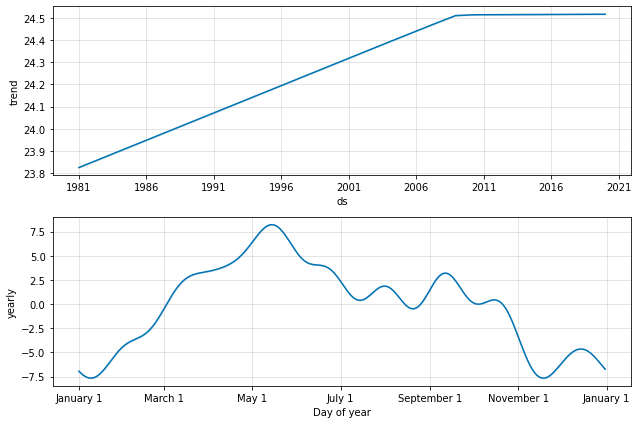

In [37]:
fig2 = model.plot_components(forecast)

In [38]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12, 1) (168, 1)
27.789473683587712


,mid_temp,Month,yhat
0,8.20,1,19.983495
1,19.40,1,19.983495
2,21.25,1,19.983495
3,10.45,1,19.983495
4,11.80,1,19.983495
...,...,...,...
163,24.45,12,17.864698
164,17.80,12,17.864698
165,20.15,12,17.864698
166,20.65,12,17.864698


In [39]:
import matplotlib.pyplot as plt

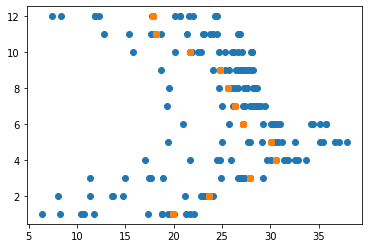

In [40]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [41]:
import pickle

In [45]:
filename = 'Cluster 15 - 0.sav'
pickle.dump(model, open(filename, 'wb'))

In [46]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [47]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,23.825352,11.778635,22.183057,23.825352,23.825352,-6.939400,-6.939400,-6.939400,-6.939400,-6.939400,-6.939400,0.0,0.0,0.0,16.885952
1,1981-02-01,23.827438,14.218927,25.318994,23.827438,23.827438,-4.331869,-4.331869,-4.331869,-4.331869,-4.331869,-4.331869,0.0,0.0,0.0,19.495570
2,1981-03-01,23.829323,17.911610,28.701781,23.829323,23.829323,-0.444175,-0.444175,-0.444175,-0.444175,-0.444175,-0.444175,0.0,0.0,0.0,23.385148
3,1981-04-01,23.831410,21.999518,32.634193,23.831410,23.831410,3.404517,3.404517,3.404517,3.404517,3.404517,3.404517,0.0,0.0,0.0,27.235927
4,1981-05-01,23.833430,25.023079,35.438106,23.833430,23.833430,6.430554,6.430554,6.430554,6.430554,6.430554,6.430554,0.0,0.0,0.0,30.263984
